In [1]:
import pandas as pd
import numpy as np
from decimal import*
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv("extracted_data.csv", index_col=False).set_index("ID")

In [15]:
df.columns.tolist()

['Project_Name',
 'Bench_File_Name',
 'Bench_Method_Name',
 'itr_to_stds_avrg',
 'itr_to_stds_std',
 'Num_of_change_points_avrg',
 'STD',
 'AVRG',
 'Bench_File_Nloc',
 'Bench_Method_Nloc',
 'Bench_Method_NestingLevel',
 'Bench_Method_CCN',
 'Bench_File_CCN_Avrg',
 'Number_of_tryCatch',
 'Number_of_switchCase',
 'Number_of_systemCalls',
 'Synchronization',
 'Number_of_forLoops',
 'Number_of_whileLoops',
 'Number_of_packages',
 'Number_of_functionCalls',
 'Number_of_parameters',
 'Benchmark_name_length',
 'Number_of_no_steady_forks',
 'class']

In [102]:
df = df.rename(columns={"class":"cls"})


corrupt = []
for col in cols[3:]:
    corrupt.append(df.index[(df[col] == "Entity: line 83: parser error : Char 0x0 out of allowed range")].tolist())
    corrupt.append(df.index[(df[col] == "Entity: line 87: parser error : Char 0x0 out of allowed range")].tolist())
    corrupt.append(df.index[(df[col] == "Entity: line 137: parser error : Char 0x0 out of allowed range")].tolist())
    corrupt.append(df.index[(df[col] == "Error Parsing: Document is empty")].tolist())
    
cols = df.columns.tolist()
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="ignore")

flatten_corrupt = set([j for sub in corrupt for j in sub])
print("Number of cprrupted benchmark records: ", len(flatten_corrupt))

df = df.drop(flatten_corrupt)
df = df.drop(["Synchronization"], axis=1)

Number of cprrupted benchmark records:  27


In [103]:
bench_method_features = ['Bench_Method_Nloc', 'Bench_Method_NestingLevel', 'Bench_Method_CCN'
                         , 'Number_of_tryCatch', 'Number_of_switchCase', 'Number_of_systemCalls',
                        'Number_of_forLoops', 'Number_of_whileLoops', 'Number_of_functionCalls', 
                         'Number_of_no_steady_forks', 'cls']

dfui = df.drop(df.iloc[:, 3:8].columns.tolist(), axis=1).copy()
projects_names = list(set(dfui["Project_Name"].tolist()))
bench_files_name = list(set(dfui["Bench_File_Name"].tolist()))
dfui

,Project_Name,Bench_File_Name,Bench_Method_Name,Bench_File_Nloc,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Bench_File_CCN_Avrg,Number_of_tryCatch,Number_of_switchCase,Number_of_systemCalls,Number_of_forLoops,Number_of_whileLoops,Number_of_packages,Number_of_functionCalls,Number_of_parameters,Benchmark_name_length,Number_of_no_steady_forks,cls
ID,,,,,,,,,,,,,,,,,,,
91f071f1f69bf48297887879cf5e5613552a29bc,protostuff__protostuff,RuntimeSchemaBenchmark.java,runtime_sparse_deserialize_10_int_field,277.0,6.0,1.0,1.0,1.000000,0,0,0,0,0,22,2,0.0,27.0,0.0,1.0
fb2459909444ecbdf72e47a11179359e56778dcd,netty__netty,AsciiStringBenchmark.java,hashCodeBenchBytesOld,55.0,8.0,1.0,2.0,1.400000,0,0,0,1,0,12,4,1.0,25.0,0.0,1.0
1c51969ca9fc7c1b5a7ac533bfa76899ac30ed88,apache__hive,VectorGroupByOperatorBench.java,testAggCount,177.0,3.0,1.0,1.0,1.333333,0,0,0,0,0,43,1,6.0,31.0,0.0,1.0
2b3a09d375526c8e9c7641660de34577306fb84e,apache__logging-log4j2,ThreadsafeDateFormatBenchmark.java,fastDateFormat,183.0,3.0,1.0,1.0,1.350000,0,0,1,0,0,14,2,0.0,34.0,2.0,0.0
ca5d32819509b08c929db359c6f8dddad84e62f4,RoaringBitmap__RoaringBitmap,BatchIteratorBenchmark.java,batchIterate,54.0,11.0,1.0,3.0,2.000000,0,0,0,1,1,3,3,4.0,27.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a3b2d7b3a6ece03ec9db59ba9385a7199cace1b,apache__tinkerpop,GremlinGroovyScriptEngineBenchmark.java,testEvalLongCached,79.0,3.0,1.0,1.0,1.555556,0,0,0,0,0,18,1,0.0,39.0,0.0,1.0
0b0eb41a2e416dd93cf156632edab78e7227fab6,eclipse__jetty.project,StringReplaceBenchmark.java,testJavaStringReplaceReduce,85.0,4.0,1.0,1.0,1.375000,0,0,0,0,0,15,2,2.0,27.0,0.0,1.0
8ac7776547858abdceb1e0b055d762870adcc23a,imglib__imglib2,SyncedPositionablesBenchmark.java,benchmark5,64.0,4.0,1.0,1.0,1.000000,0,0,0,0,0,16,12,0.0,33.0,0.0,1.0


# Manual Mining:

In [93]:
stds_nstds_feature_diff_pname_max = list()
for project in projects_names[:]:
    max_no_steady = dfui[(dfui["Project_Name"] == project)].Number_of_no_steady_forks.max()
    if max_no_steady > 0:
        no_steady = dfui[(dfui["Project_Name"] == project) & (dfui["Number_of_no_steady_forks"] == max_no_steady)][bench_method_features]
        steady = dfui[(dfui["Project_Name"] == project) & (dfui["cls"] == 1)][bench_method_features]

        x = no_steady.values.tolist()[0]
        x = np.array(x, dtype=float)
        y = steady.mean().tolist()
        y = np.array(y, dtype=float)
        #stds_nstds_feature_diff_pname_g5.append({ project : np.subtract(x[:-2], y[:-2]) })
        stds_nstds_feature_diff_pname_max.append( np.subtract(x[:-2], y[:-2]) )
    else:
        continue

tmp = pd.DataFrame(stds_nstds_feature_diff_pname_max)
tmp.columns = bench_method_features[:-2]
tmp

,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Number_of_tryCatch,Number_of_switchCase,Number_of_systemCalls,Number_of_forLoops,Number_of_whileLoops,Number_of_functionCalls
0,-0.900000,0.0,-0.100000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-2.261122e+08
1,3.333333,0.0,0.000000,-9.175092e+08,0.000000,0.0,0.000000e+00,0.000000e+00,-1.869519e+10
2,3.200000,0.0,0.800000,0.000000e+00,-666666.666667,0.0,-6.666668e+12,-6.666667e+01,-2.747555e+14
3,-2.166667,0.0,-0.500000,0.000000e+00,0.000000,0.0,-1.766760e+10,0.000000e+00,-1.010926e+10
4,-3.909091,0.0,-0.363636,-9.090909e-01,0.000000,0.0,-9.181818e+07,0.000000e+00,-2.923833e+14
5,1.285714,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-7.447271e+05
6,-9.789474,0.0,-4.210526,-5.847953e+16,0.000000,0.0,0.000000e+00,-5.794795e+15,-5.205205e+17
7,-8.600000,0.0,-1.600000,0.000000e+00,0.000000,0.0,-1.101111e+08,0.000000e+00,-3.323333e+08
8,-2.500000,0.0,-0.500000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-2.339667e+03
9,2.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-3.174563e+05


In [83]:
stds_nstds_feature_diff_pname_g5 = list()
for project in projects_names[:]:
    max_no_steady = dfui[(dfui["Project_Name"] == project)].Number_of_no_steady_forks.max()
    if max_no_steady > 5:
        no_steady = dfui[(dfui["Project_Name"] == project) & (dfui["Number_of_no_steady_forks"] == max_no_steady)][bench_method_features]
        steady = dfui[(dfui["Project_Name"] == project) & (dfui["cls"] == 1)][bench_method_features]

        x = no_steady.values.tolist()[0]
        x = np.array(x, dtype=float)
        y = steady.mean().tolist()
        y = np.array(y, dtype=float)
        #stds_nstds_feature_diff_pname_g5.append({ project : np.subtract(x[:-2], y[:-2]) })
        stds_nstds_feature_diff_pname_g5.append( np.subtract(x[:-2], y[:-2]) )
    else:
        continue

tmp = pd.DataFrame(stds_nstds_feature_diff_pname_g5)
tmp.columns = bench_method_features[:-2]
tmp

,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Number_of_tryCatch,Number_of_switchCase,Number_of_systemCalls,Number_of_forLoops,Number_of_whileLoops,Number_of_functionCalls
0,-0.900000,0.0,-0.100000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-2.261122e+08
1,3.200000,0.0,0.800000,0.000000e+00,-666666.666667,0.0,-6.666668e+12,-6.666667e+01,-2.747555e+14
2,-9.789474,0.0,-4.210526,-5.847953e+16,0.000000,0.0,0.000000e+00,-5.794795e+15,-5.205205e+17
3,-8.600000,0.0,-1.600000,0.000000e+00,0.000000,0.0,-1.101111e+08,0.000000e+00,-3.323333e+08
4,-2.500000,0.0,-0.500000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-2.339667e+03
5,2.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-3.174563e+05
6,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-2.638888e+06
7,1.937500,0.0,0.875000,0.000000e+00,0.000000,0.0,-6.250000e+07,-6.240000e+02,-1.381488e+19
8,-6.000000,0.0,-0.125000,0.000000e+00,0.000000,0.0,-1.250012e+04,-1.376263e+06,-1.701990e+09
9,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,-2.686102e+10


In [86]:
stds_nstds_feature_diff_bname_max = list()
for bench in bench_files_name[:]:
    max_no_steady = dfui[(dfui["Bench_File_Name"] == bench)].Number_of_no_steady_forks.max()
    no_steady = dfui[(dfui["Bench_File_Name"] == bench) & (dfui["Number_of_no_steady_forks"] == max_no_steady)][bench_method_features]
    steady = dfui[(dfui["Bench_File_Name"] == bench) & (dfui["cls"] == 1)][bench_method_features]
    
    x = no_steady.values.tolist()[0]
    x = np.array(x, dtype=float)
    y = steady.mean().tolist()
    y = np.array(y, dtype=float)
    stds_nstds_feature_diff_bname_max.append(np.subtract(x[:-2], y[:-2]) )

tmp = pd.DataFrame(stds_nstds_feature_diff_bname_max)
tmp.columns = bench_method_features[:-2]
tmp.dropna()

,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Number_of_tryCatch,Number_of_switchCase,Number_of_systemCalls,Number_of_forLoops,Number_of_whileLoops,Number_of_functionCalls
0,1.2,0.0,0.6,-2221.200000,0.0,0.0,-4420.2,-2221.2,-1.554840e+04
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.350000e+01
3,0.0,0.0,0.0,-36.000000,0.0,0.0,0.0,0.0,-1.436667e+02
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-4.442400e+03
10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...
197,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-6.944444e+13
200,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
201,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-4.950000e+02
203,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-3.703500e+04


In [104]:
stds_nstds_feature_diff_bname_g5 = list()
for bench in bench_files_name[:]:
    max_no_steady = dfui[(dfui["Bench_File_Name"] == bench)].Number_of_no_steady_forks.max()
    if max_no_steady > 0:
        no_steady = dfui[(dfui["Bench_File_Name"] == bench) & (dfui["Number_of_no_steady_forks"] == max_no_steady)][bench_method_features]
        steady = dfui[(dfui["Bench_File_Name"] == bench) & (dfui["cls"] == 1)][bench_method_features]

        x = no_steady.values.tolist()[0]
        x = np.array(x, dtype=float)
        y = steady.mean().tolist()
        y = np.array(y, dtype=float)
        stds_nstds_feature_diff_bname_g5.append( np.subtract(x[:-2], y[:-2]) )
    else:
        continue
stds_nstds_feature_diff_bname_g5
tmp = pd.DataFrame(stds_nstds_feature_diff_bname_g5)
tmp.columns = bench_method_features[:-2]
tmp.dropna()

,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Number_of_tryCatch,Number_of_switchCase,Number_of_systemCalls,Number_of_forLoops,Number_of_whileLoops,Number_of_functionCalls
0,1.200000,0.0,0.600000,-2221.20,0.0,0.0,-4420.20,-2.221200e+03,-1.554840e+04
1,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,-1.350000e+01
3,0.000000,0.0,0.000000,-36.00,0.0,0.0,0.00,0.000000e+00,-1.436667e+02
9,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00
14,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00
15,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00
16,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,-1.080000e+02
17,0.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00
23,-1.000000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000000e+00,0.000000e+00
25,-1.666667,0.0,-0.111111,0.00,0.0,0.0,0.00,0.000000e+00,-1.572390e+16


In [98]:
len(bench_files_name)

207

In [49]:
x = no_steady.values.tolist()[0]

In [51]:
x = np.array(x, dtype=float)
x

array([8., 1., 2., 0., 0., 0., 0., 0., 3., 7., 0.])

In [40]:
y = steady.mean().tolist()

In [42]:
y = np.array(y, dtype=float)
y

[4.8,
 1.0,
 1.2,
 0.0,
 666666.6666666666,
 0.0,
 6666668000000.0,
 66.66666666666667,
 274755490948281.6,
 0.0,
 1.0]

In [53]:
np.subtract(x[:-2], y[:-2])

array([ 3.20000000e+00,  0.00000000e+00,  8.00000000e-01,  0.00000000e+00,
       -6.66666667e+05,  0.00000000e+00, -6.66666800e+12, -6.66666667e+01,
       -2.74755491e+14])

In [41]:
s = list()
for i, j in zip(x, y):
    t = i-j
    s.append(t)
t

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [188]:
dfui[(dfui["Project_Name"] == project)].Number_of_no_steady_forks.max()

6.0

In [43]:
df.style.format({"itr_to_stds_std":"{:.2f}", "itr_to_stds_avrg":"{:.2f}", "Num_of_change_points_avrg":"{:.2f}",
                    "Bench_File_Nloc":"{:.0f}", "Bench_Method_Nloc":"{:.0f}", "Bench_Method_NestingLevel":"{:.0f}",
                    "Bench_Method_CCN":"{:.2f}", "Bench_File_CCN_Avrg":"{:.2f}"})

,Project_Name,Bench_File_Name,Bench_Method_Name,itr_to_stds_avrg,itr_to_stds_std,Num_of_change_points_avrg,STD,AVRG,Bench_File_Nloc,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Bench_File_CCN_Avrg,Number_of_tryCatch,Number_of_switchCase,Number_of_systemCalls,Synchronization,Number_of_forLoops,Number_of_whileLoops,Number_of_packages,Number_of_functionCalls,Number_of_parameters,Benchmark_name_length,Number_of_no_steady_forks,class
ID,,,,,,,,,,,,,,,,,,,,,,,,,
91f071f1f69bf48297887879cf5e5613552a29bc,protostuff__protostuff,RuntimeSchemaBenchmark.java,runtime_sparse_deserialize_10_int_field,1740.10,1021.20,3.10,0.000000,0.000000,277,6,1,1.00,1.00,0,0,0,0.000000,0,0,22,2,0.000000,27.000000,0.000000,1.000000
fb2459909444ecbdf72e47a11179359e56778dcd,netty__netty,AsciiStringBenchmark.java,hashCodeBenchBytesOld,196.60,326.93,1.30,0.000000,0.000000,55,8,1,2.00,1.40,0,0,0,0.000000,1,0,12,4,1.000000,25.000000,0.000000,1.000000
1c51969ca9fc7c1b5a7ac533bfa76899ac30ed88,apache__hive,VectorGroupByOperatorBench.java,testAggCount,363.50,396.64,1.80,0.000000,0.000000,177,3,1,1.00,1.33,0,0,0,0.000000,0,0,43,1,6.000000,31.000000,0.000000,1.000000
2b3a09d375526c8e9c7641660de34577306fb84e,apache__logging-log4j2,ThreadsafeDateFormatBenchmark.java,fastDateFormat,2256.70,982.81,7.50,0.000000,0.000001,183,3,1,1.00,1.35,0,0,1,0.000000,0,0,14,2,0.000000,34.000000,0.000000,0.000000
ca5d32819509b08c929db359c6f8dddad84e62f4,RoaringBitmap__RoaringBitmap,BatchIteratorBenchmark.java,batchIterate,1628.10,734.58,3.50,0.000118,0.001246,54,11,1,3.00,2.00,0,0,0,0.000000,1,1,3,3,4.000000,27.000000,0.000000,1.000000
99a981a434c91dca43ce78ae566b963df507783b,apache__hive,VectorGroupByOperatorBench.java,testAggCount,330.40,631.84,1.40,0.000000,0.000000,177,3,1,1.00,1.33,0,0,0,0.000000,0,0,43,1,6.000000,31.000000,0.000000,1.000000
08e9f26e3ca1e054c7c50c347c05b306e6129d69,apache__camel,TypeConverterTest.java,typeConvertStringToInputStream,2369.80,658.94,10.40,0.000001,0.000003,108,4,1,1.00,1.18,0,0,0,0.000000,0,0,22,3,0.000000,22.000000,0.000000,0.000000
2ac4fe37cd482f2fe8c4e3f2128c715c96812857,hazelcast__hazelcast,OAHashSetBenchmark.java,contains_hz_OAHashSet,2458.10,411.40,11.80,0.000000,0.000000,254,4,1,1.00,1.45,0,0,0,0.000000,0,0,24,2,1.000000,23.000000,0.000000,0.000000
8cb6a001e50e4a2245fc33cc0dbf50cfdd415f7c,apache__arrow,BitVectorHelperBenchmarks.java,allBitsNullBenchmark,2345.80,796.69,4.20,0.000000,0.000000,137,4,1,1.00,1.38,0,0,0,0.000000,0,0,18,1,0.000000,30.000000,0.000000,0.000000


In [5]:
df = df.select_dtypes(include=["float"])

In [21]:
steady_benchmarks = df[df["class"] == 1]
steady_benchmarks

,itr_to_stds_avrg,itr_to_stds_std,Num_of_change_points_avrg,STD,AVRG,Bench_File_Nloc,Bench_Method_Nloc,Bench_Method_NestingLevel,Bench_Method_CCN,Bench_File_CCN_Avrg,Synchronization,Number_of_parameters,Benchmark_name_length,Number_of_no_steady_forks,class
ID,,,,,,,,,,,,,,,
91f071f1f69bf48297887879cf5e5613552a29bc,1740.1,1021.197968,3.1,6.510561e-08,1.869715e-07,277.0,6.0,1.0,1.0,1.000000,0.0,0.0,27.0,0.0,1.0
fb2459909444ecbdf72e47a11179359e56778dcd,196.6,326.932470,1.3,6.980091e-09,1.831741e-07,55.0,8.0,1.0,2.0,1.400000,0.0,1.0,25.0,0.0,1.0
1c51969ca9fc7c1b5a7ac533bfa76899ac30ed88,363.5,396.638689,1.8,1.043777e-08,8.916153e-08,177.0,3.0,1.0,1.0,1.333333,0.0,6.0,31.0,0.0,1.0
ca5d32819509b08c929db359c6f8dddad84e62f4,1628.1,734.577491,3.5,1.180394e-04,1.245521e-03,54.0,11.0,1.0,3.0,2.000000,0.0,4.0,27.0,0.0,1.0
99a981a434c91dca43ce78ae566b963df507783b,330.4,631.838777,1.4,1.845295e-08,1.005490e-07,177.0,3.0,1.0,1.0,1.333333,0.0,6.0,31.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a3b2d7b3a6ece03ec9db59ba9385a7199cace1b,1124.9,1081.148783,2.7,1.093954e-02,5.990179e-04,79.0,3.0,1.0,1.0,1.555556,0.0,0.0,39.0,0.0,1.0
0b0eb41a2e416dd93cf156632edab78e7227fab6,1833.0,913.468883,5.3,1.698672e-07,2.915286e-07,85.0,4.0,1.0,1.0,1.375000,0.0,2.0,27.0,0.0,1.0
8ac7776547858abdceb1e0b055d762870adcc23a,582.0,0.000000,3.0,1.060187e-02,3.083067e-02,64.0,4.0,1.0,1.0,1.000000,0.0,0.0,33.0,0.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

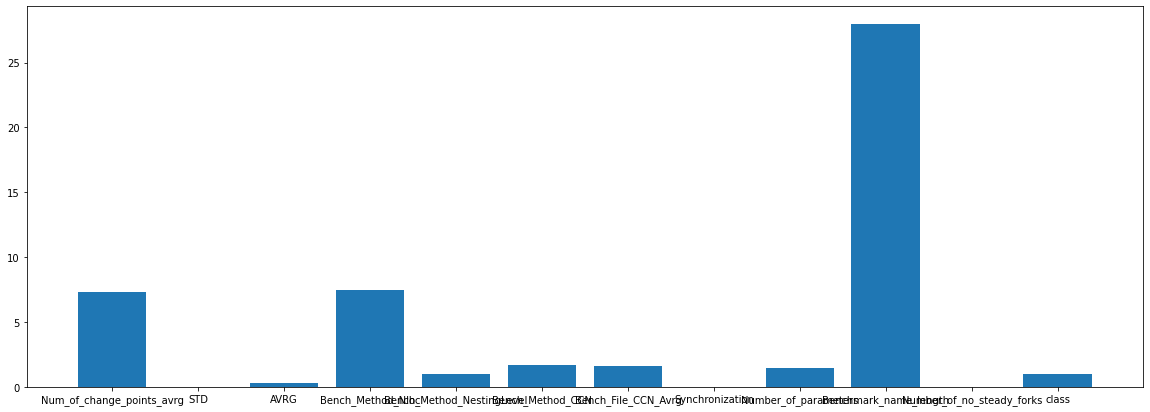

In [28]:
features = steady_benchmarks.drop(["itr_to_stds_avrg", "itr_to_stds_std", "Bench_File_Nloc"], axis=1, inplace=False).columns
average_values = steady_benchmarks.drop(["itr_to_stds_avrg", "itr_to_stds_std", "Bench_File_Nloc"], axis=1).mean().values

fig = plt.figure(figsize =(20, 7))

plt.bar(features, average_values)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

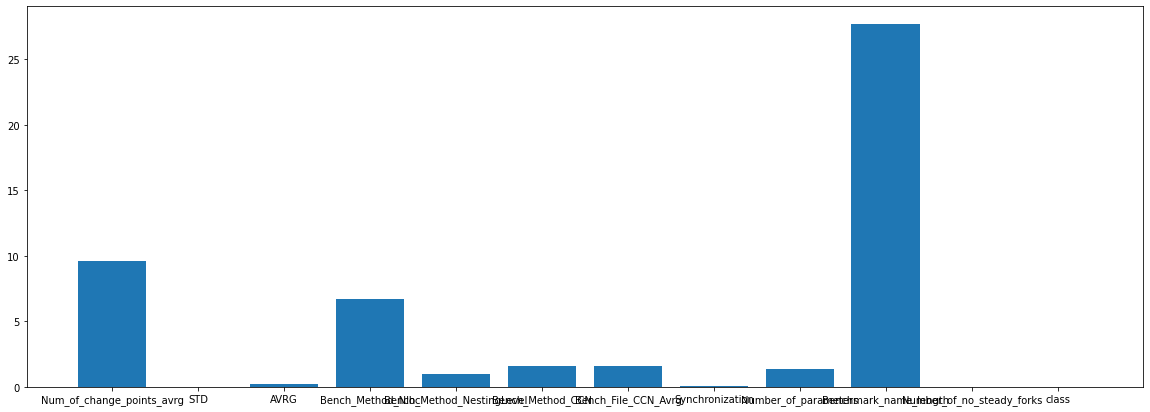

In [29]:
inconsistent = df[df["class"] == 0]
features = inconsistent.drop(["itr_to_stds_avrg", "itr_to_stds_std", "Bench_File_Nloc"], axis=1, inplace=False).columns
average_values = inconsistent.drop(["itr_to_stds_avrg", "itr_to_stds_std", "Bench_File_Nloc"], axis=1).mean().values

fig = plt.figure(figsize =(20, 7))

plt.bar(features, average_values)
plt.show

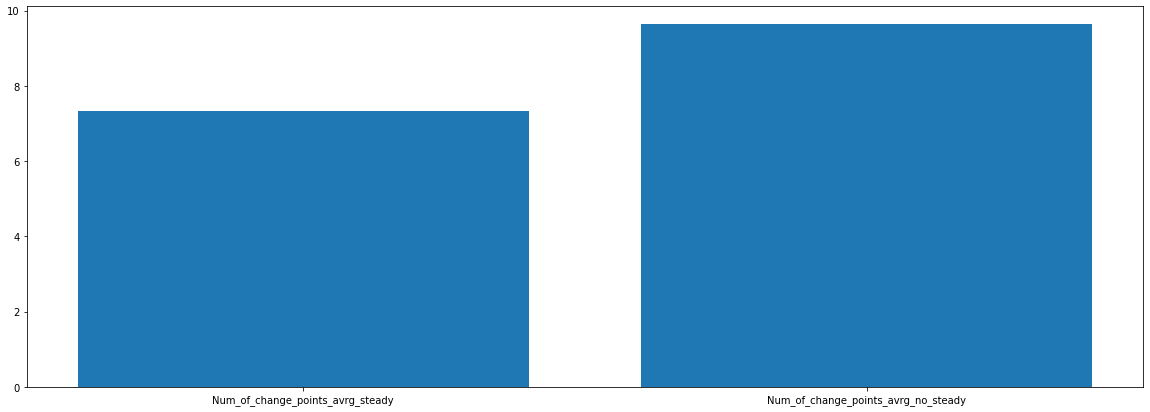

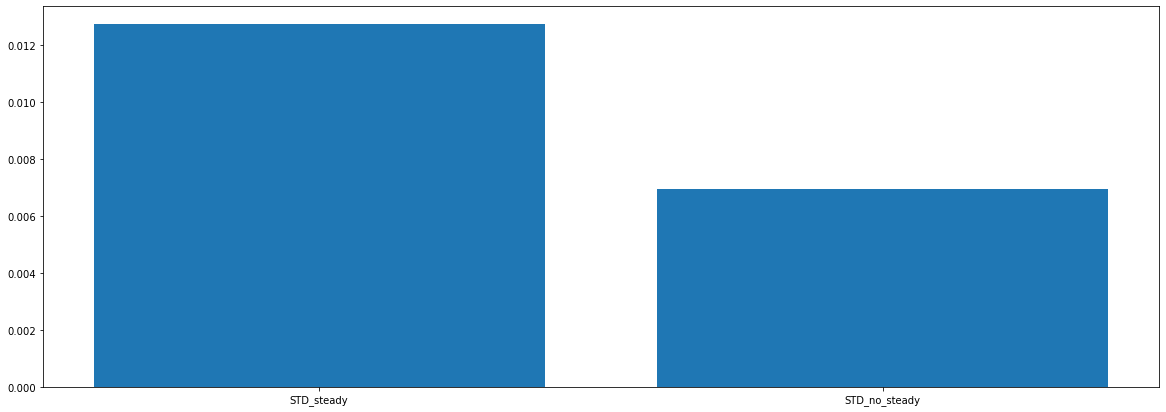

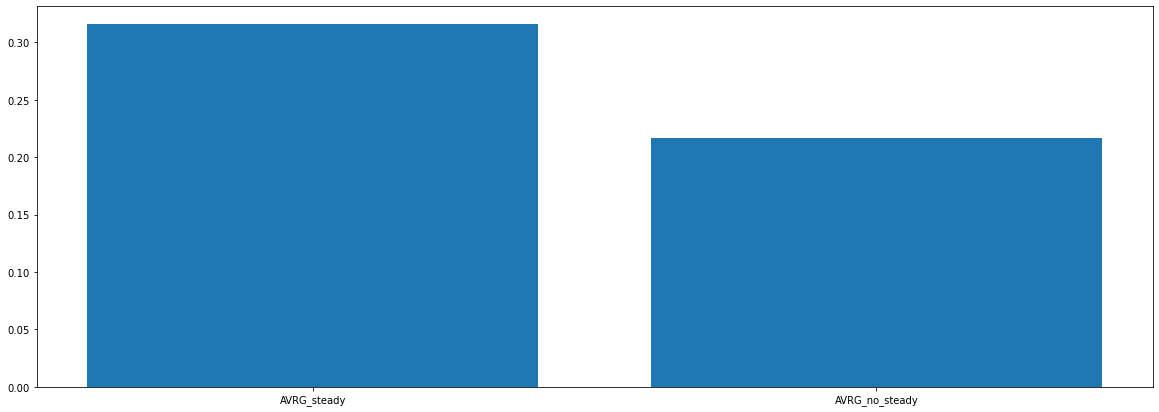

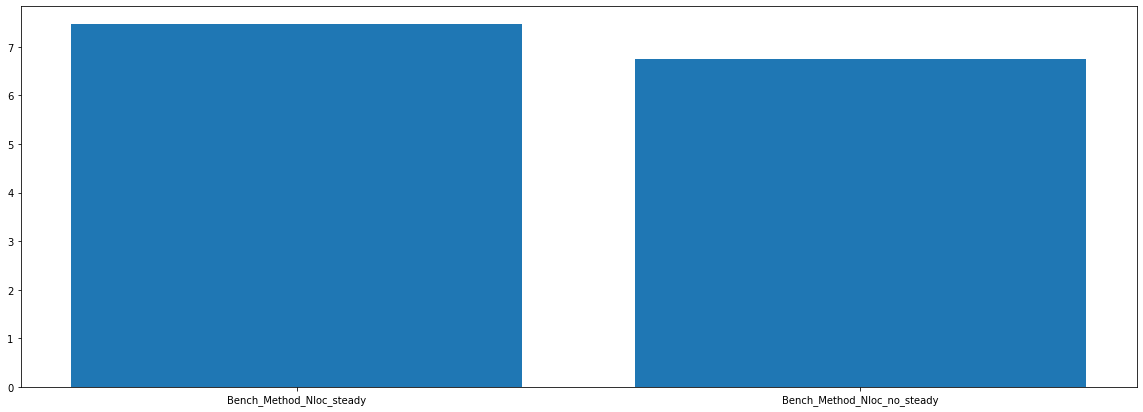

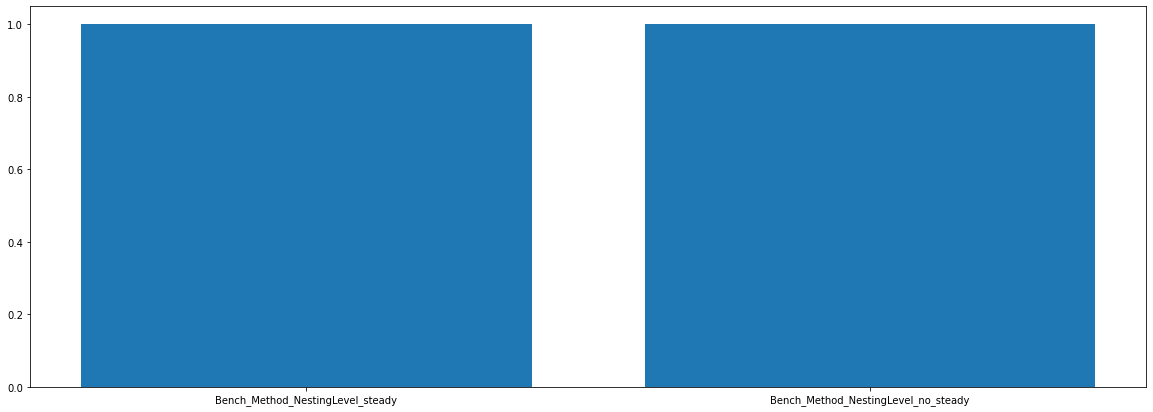

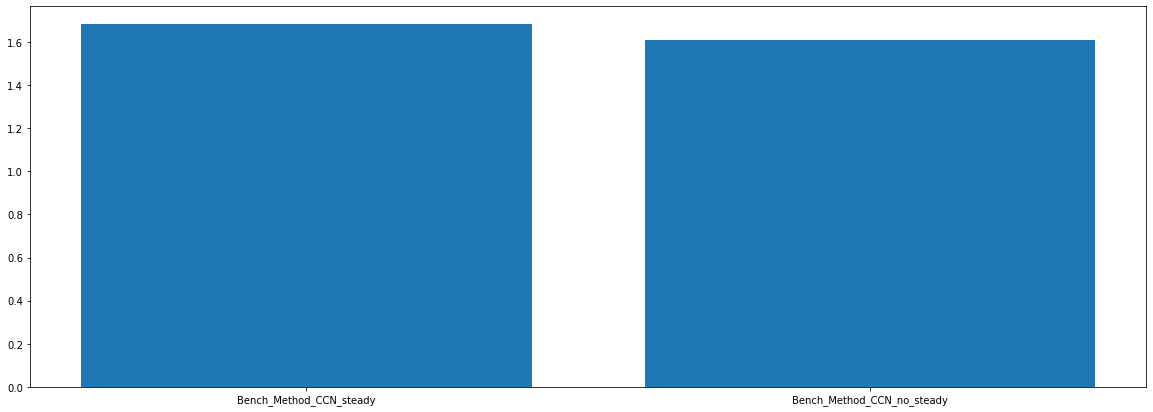

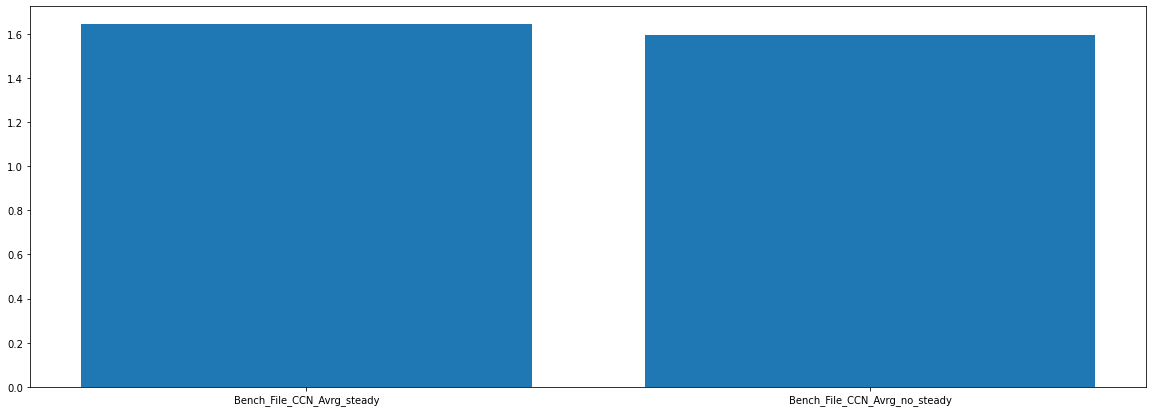

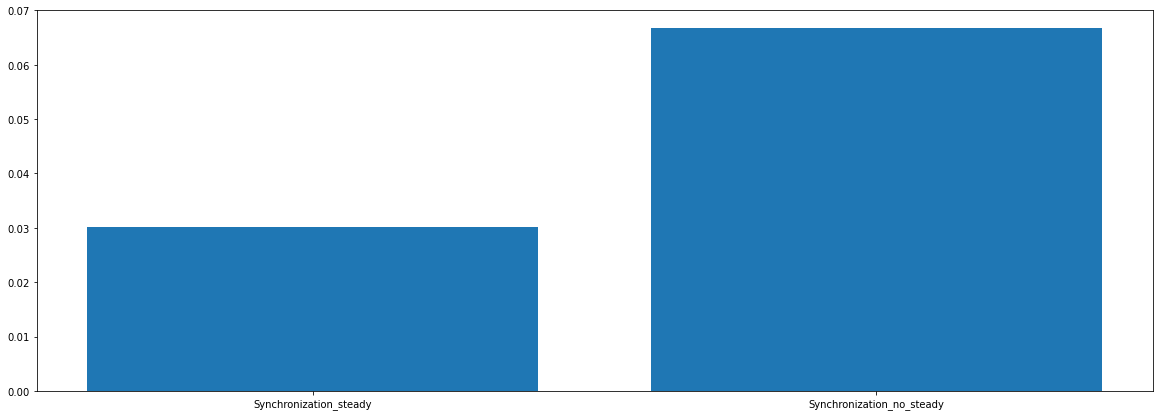

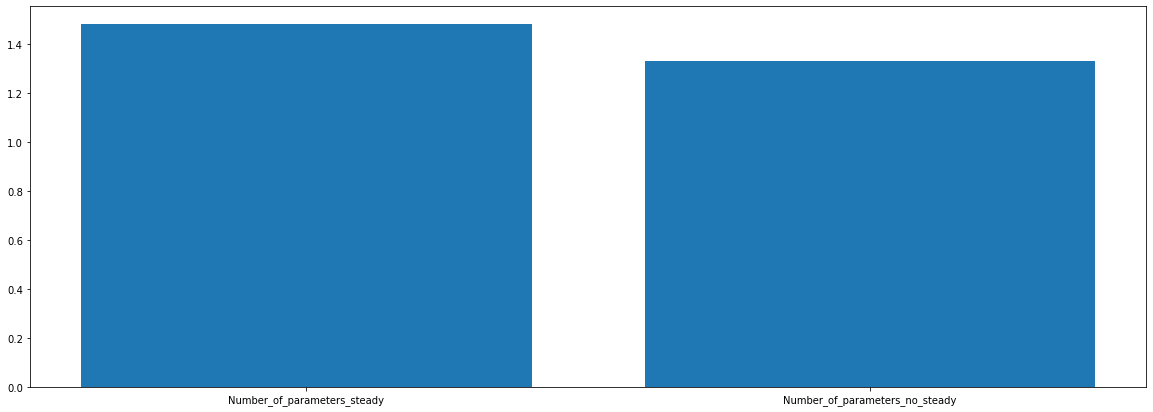

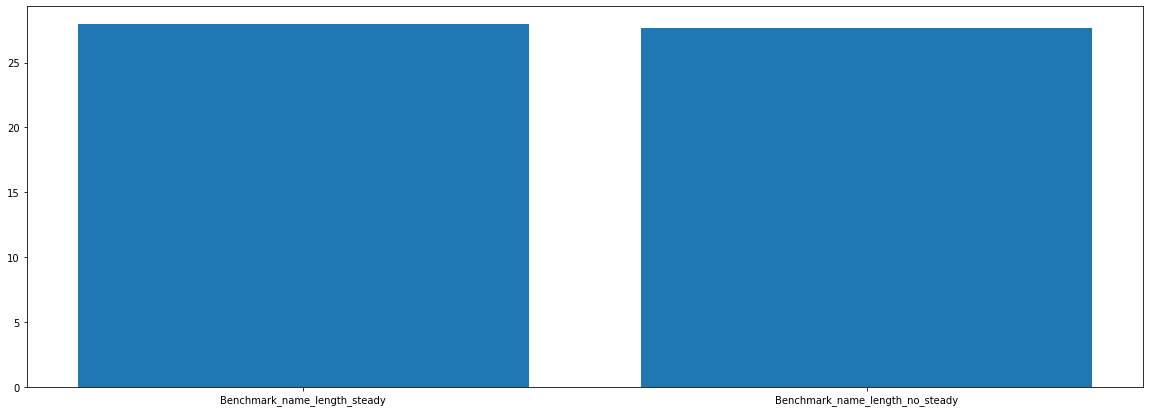

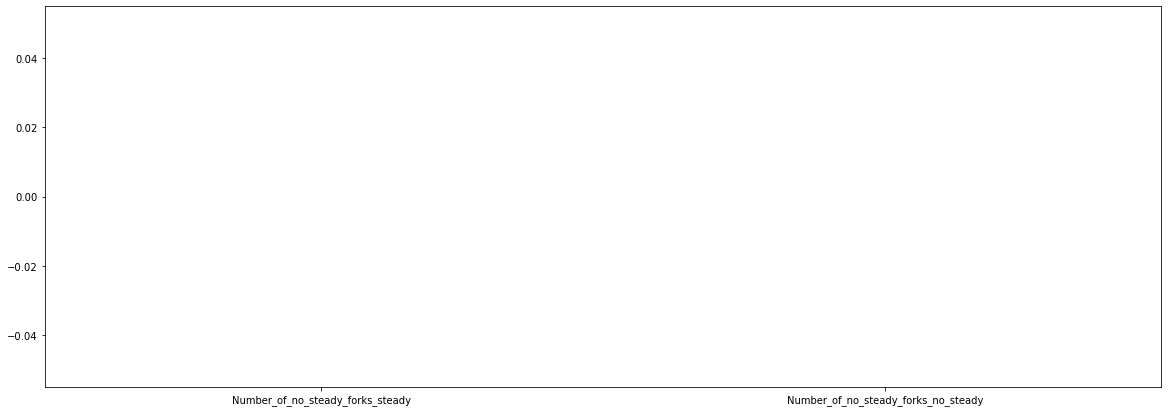

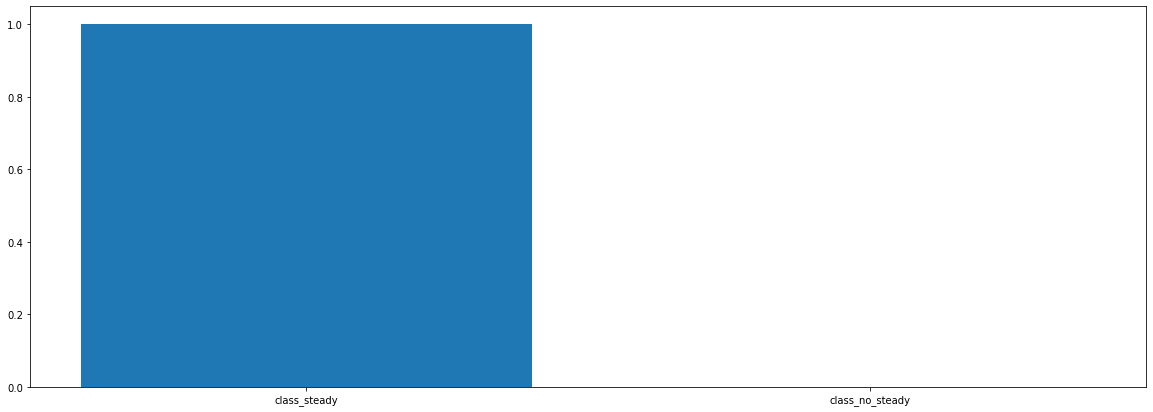

In [32]:
features = inconsistent.drop(["itr_to_stds_avrg", "itr_to_stds_std", "Bench_File_Nloc"]
                  , axis=1, inplace=False).columns.tolist()
for feature in features:
    x = [feature + "_steady", feature + "_no_steady"]
    y = [steady_benchmarks[feature].mean(), inconsistent[feature].mean()]
    
    fig = plt.figure(figsize =(20, 7))

    plt.bar(x, y)
    plt.show

In [30]:
steady_benchmarks["itr_to_stds_avrg"].mean()

1390.202114803626